In [5]:
import tensorflow as tf
import numpy as np
import skimage.io as io
from PIL import Image

In [2]:
# Read image data from tfrecords?

image_dat_loc_tfrec = "helping_utils/test_tfrec_imgs.tfrecords"
IMAGE_HEIGHT=200
IMAGE_WIDTH=200

def read_and_decode(filename_queue):
    reader = tf.TFRecordReader()
    _,serialized_example = reader.read(filename_queue)
    features = tf.parse_single_example(
        serialized_example,
        features = {
            'height':tf.FixedLenFeature([],tf.int64),
            'width':tf.FixedLenFeature([],tf.int64),
            'image_raw': tf.FixedLenFeature([],tf.string),
            'mask_raw': tf.FixedLenFeature([],tf.string)
        }
    )
    image = tf.decode_raw(features['image_raw'],tf.uint8)
    annotation = tf.decode_raw(features['mask_raw'],tf.uint8)
    
    height = tf.cast(features['height'], tf.int32)
    width = tf.cast(features['width'],tf.int32)
    image_shape = tf.stack([height, width, 3])
    annotation_shape = tf.stack([height, width, 1])
    
    image = tf.reshape(image,image_shape)
    annotation = tf.reshape(annotation,annotation_shape)
    image_size_const = tf.constant((IMAGE_HEIGHT, IMAGE_WIDTH, 3), dtype=tf.int32)
    annotation_size_const = tf.constant((IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=tf.int32)
    resized_image = tf.image.resize_image_with_crop_or_pad(image=image,
                                           target_height=IMAGE_HEIGHT,
                                           target_width=IMAGE_WIDTH)
    
    resized_annotation = tf.image.resize_image_with_crop_or_pad(image=annotation,
                                           target_height=IMAGE_HEIGHT,
                                           target_width=IMAGE_WIDTH)
    
    images, annotations = tf.train.shuffle_batch( [resized_image, resized_annotation],
                                                 batch_size=10,
                                                 capacity=30,
                                                 num_threads=2,
                                                 min_after_dequeue=10
                                                )
    return images, annotations

(10, 200, 200, 3)


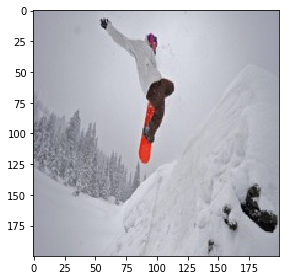

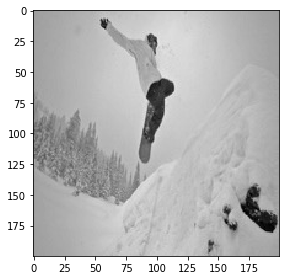

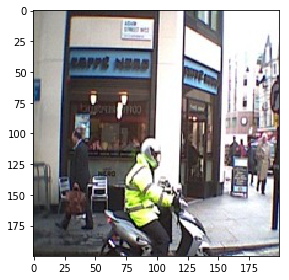

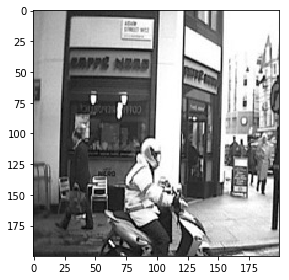

(10, 200, 200, 3)
INFO:tensorflow:Error reported to Coordinator: <class 'tensorflow.python.framework.errors_impl.CancelledError'>, Enqueue operation was cancelled
	 [[Node: shuffle_batch_1/random_shuffle_queue_enqueue = QueueEnqueueV2[Tcomponents=[DT_UINT8, DT_UINT8], timeout_ms=-1, _device="/job:localhost/replica:0/task:0/device:CPU:0"](shuffle_batch_1/random_shuffle_queue, Squeeze_2, Squeeze_3)]]


KeyboardInterrupt: 

In [6]:
filename_queue = tf.train.string_input_producer([image_dat_loc_tfrec],num_epochs=10)
image,annotation = read_and_decode(filename_queue)
init_group = tf.group(tf.global_variables_initializer(),tf.local_variables_initializer())
# Test the input images
with tf.Session() as sess:
    sess.run(init_group)
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    
    #Let's read 10 batches for eg
    for i in xrange(5):
        img, anno = sess.run([image, annotation])
        print img.shape
        io.imshow(img[0, :, :, :])
        io.show()
        io.imshow(anno[0, :, :, 0])
        io.show()
        io.imshow(img[1, :, :, :])
        io.show()
        io.imshow(anno[1, :, :, 0])
        io.show()
    coord.request_stop()
    coord.join(threads)


In [ ]:
 def BiGRU(x,weights,biases):
        